In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

Problemas: 1,6,7

## Punto 1. 

In [47]:
def SOR(A, b, x0, omega=1, itmax=800, tol=1e-9):
    
    x = x0.copy()
    
    for it in range(1,itmax):
        for i in range(A.shape[0]):
            sum_ = 0.
            for j in range(A.shape[1]):
                if j!=i:
                    sum_ += A[i,j]*x[j]
            x[i] = (1-omega)*x[i] + omega*((b[i] - sum_)/A[i,i])
        
        residuo = np.linalg.norm( np.dot(A,x) - b )
        
        if np.allclose(residuo, tol, atol=tol):
            break
    return x

$$\mathbb{A}^T\mathbb{A}\vec{x} = \mathbb{A}^T\vec{b}$$

In [53]:
A = np.array([[2.,-1],[1.,2],[1.,1.]])

b = np.array([2.,1.,4.])
x_ = np.array([0,0]).T

LHS = A.T@A
RHS = A.T@b

In [54]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

eq1 = 2*x-2
eq2 = -(x-1)/2
eq3 = 4-x

SOR(LHS, RHS, x_)

array([1, 0])

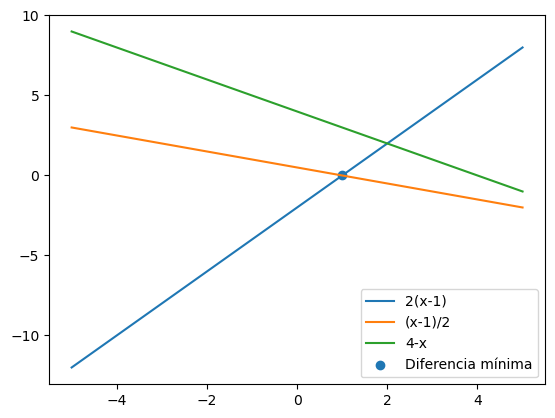

In [50]:
plt.plot(x, eq1, label = '2(x-1)')
plt.plot(x, eq2, label = '(x-1)/2')
plt.plot(x, eq3, label = '4-x')

plt.scatter(SOR(LHS, RHS, x_)[0], SOR(LHS, RHS, x_)[1], label = 'Diferencia mínima')
plt.legend()
plt.show()